In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [6]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install openpyxl



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# load the xlsx file
data = pd.read_excel("data.xlsx")

In [9]:
data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [10]:
#check the missing value
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
#check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [12]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
#check the duplicate of the dataset
data.duplicated().sum()

0

In [14]:
#remove unnecessary column
data.drop(columns=['id'], inplace=True)
print(data)


        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0         Male   44                1           28                   0   
1         Male   76                1            3                   0   
2         Male   47                1           28                   0   
3         Male   21                1           11                   1   
4       Female   29                1           41                   1   
...        ...  ...              ...          ...                 ...   
381104    Male   74                1           26                   1   
381105    Male   30                1           37                   1   
381106    Male   21                1           30                   1   
381107  Female   68                1           14                   0   
381108    Male   46                1           29                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes           4045

In [15]:
# Create Important Numerical Features for Visualization
numerical_features = ['Age', 'Annual_Premium', 'Vintage']

--> Histogram: Age Distribution , Annual_premium Distribution , Vintage Distribution


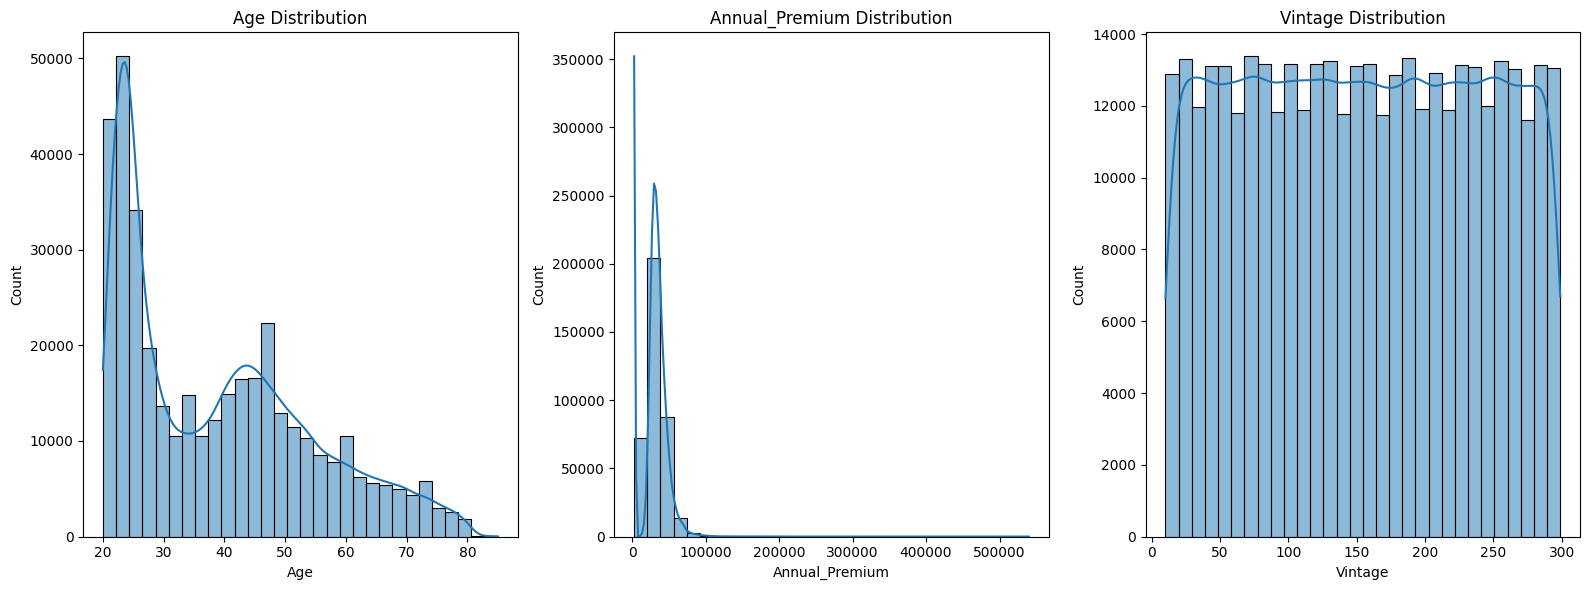

In [16]:

# Print Histogram for Visualization 
print("--> Histogram: Age Distribution , Annual_premium Distribution , Vintage Distribution")

fig, axs = plt.subplots(1, len(numerical_features), figsize=(16, 6))
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.savefig('Histograms.png', bbox_inches='tight')
plt.show()

--> Pie Chart for Gender:


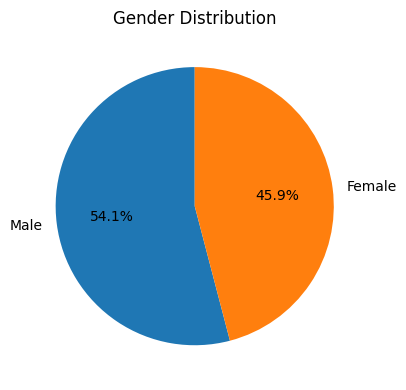

In [17]:
#print piechart for Visualization
print("--> Pie Chart for Gender:")
plt.figure(figsize=(6, 4))
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].unique(), autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.tight_layout()
plt.savefig("Gender Pie Chart.png", bbox_inches='tight', dpi=300)
plt.show()

--> Countplot for Customer Response:


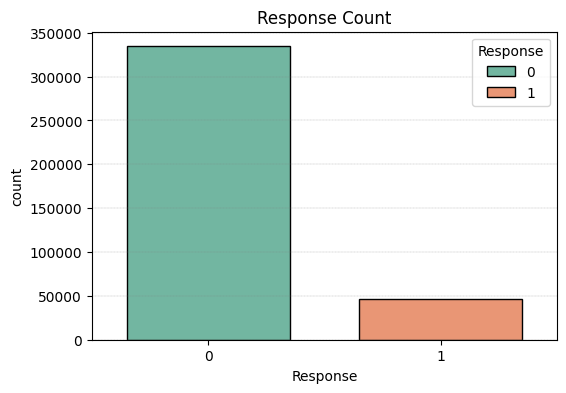

Response Rate (1/0): 
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


In [18]:
# Print Countplot for Visualization the Distribution of Customer Response

print("--> Countplot for Customer Response:")
plt.figure(figsize=(6,4))
sns.countplot(x="Response", hue="Response", palette='Set2', edgecolor="black", linewidth=1, data=data, width=0.7)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
plt.title("Response Count")
plt.savefig("Response count.png")
plt.show()

response_ratio = data['Response'].value_counts(normalize=True)
print(f"Response Rate (1/0): \n{response_ratio}")

In [19]:
#convert categorical to numerical
encoder = LabelEncoder()


In [20]:
# Apply encoding
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = encoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = encoder.fit_transform(data['Vehicle_Damage'])


In [21]:

print(data.shape) #show dataset is balanced or imbalanced


(381109, 11)


In [22]:
# Split the dataset with stratified sampling (for huge and imbalanced dataset)
data_sampled,_ = train_test_split(data, test_size=0.6, stratify=data['Response'], random_state=42)

print(f"Original dataset size: {data.shape}")
print(f"Sampled dataset size: {data_sampled.shape}")

Original dataset size: (381109, 11)
Sampled dataset size: (152443, 11)


In [23]:
# Split the dataset into features and target
X = data_sampled.drop('Response', axis=1) #Now use sampled dataset
y = data_sampled['Response']

In [24]:

# Handle imbalance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
#training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [26]:
# Scale data using standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Hyperparameter tuning with randomizedSearch for model
param_list = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2'],     
    'bootstrap': [True, False] 
}

In [28]:
#Initialize the Random Forest Model
rf = RandomForestClassifier(random_state=42)  


In [29]:
#Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=rf, 
    param_distributions=param_list, 
    n_iter=10,  
    cv=3,  
    verbose=2, 
    n_jobs=-1,  
    random_state=42)


In [30]:
#fit randomized search
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [31]:
#print best parameter
best_param = random_search.best_params_
print(best_param)


{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


In [32]:

# Best score for model
best_score = random_search.best_score_
print(best_score)


0.8582475912790751


In [33]:

#best estimator
best_esti = random_search.best_estimator_
print(best_esti)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=300,
                       random_state=42)


In [34]:

# Model Evaluation
y_pred = best_esti.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters:, {best_param}")

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)



Best Parameters:, {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.8640
Confusion Matrix:
 [[21103  5484]
 [ 1792 25125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     26587
           1       0.82      0.93      0.87     26917

    accuracy                           0.86     53504
   macro avg       0.87      0.86      0.86     53504
weighted avg       0.87      0.86      0.86     53504



In [35]:
# save the model
joblib.dump(rf,"Insurance customer prediction.pkl")
print("model saved successfully!")

model saved successfully!
